<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Gabaritos/Lista_02_gabarito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lista de Exercícios 02 - Gabarito
##EQE 358- Métodos Numéricos Aplicados a Processos Químicos
###Prof. Pedro Constantino

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# **Problema 1**

In [ ]:
# Este código é opcional. Para os que desejarem implementar a própria função de calcular normas.
# Calcular a norma absoluta ou norma-1 (por coluna)
def norma_abs(A):
    n = len(A)
    sum_max = 0
    column = 0
    column2 = 0

    for j in range(n):
        s = 0
        for i in range(n):
            s = s + abs(A[i, j])
        if s > sum_max:
            sum_max = s
            column = j
        elif s == sum_max:  # Caso encontre outra coluna com a mesma soma!
            column2 = j

    print(f"||A||1 = {sum_max}")

# Calcular a norma Euclideana (||A||e)
def norma_eucl(A):
    n = len(A)
    sum_squares = 0

    for i in range(n):
        for j in range(n):
            sum_squares = sum_squares + A[i, j] ** 2

    Ae = np.sqrt(sum_squares)
    print(f"||A||e = {Ae}")
    return

# Calcular norma máxima ou infinita (por linha)
def norma_inf(A):
    n = len(A)
    sum_max = 0
    row = 0
    row2 = 0

    for i in range(n):
        s = 0
        for j in range(n):
            s = s + abs(A[i, j])
        if s > sum_max:
            sum_max = s
            row = i
        elif s == sum_max:
            row2 = i

    print(f"||A||inf = {sum_max}")

In [ ]:
A = np.array([[1.0,1.0],
              [1.0,10005.0]])

# Meus códigos de cálculo de norma
norma_abs(A)
norma_eucl(A)
norma_inf(A)

# Função pronta do Python (norm)
print(f'Norma Absoluta Numpy = {np.linalg.norm(A,1)}')
print(f'Norma Euclidiana Numpy= {np.linalg.norm(A)}')
print(f'Norma Infinita Numpy = {np.linalg.norm(A,np.inf)}')

# Número de Condicionamento
cond_A = np.linalg.cond(A,'fro')
print(f'cond(A)={cond_A}')

||A||1 = 10006.0
||A||e = 10005.000149925036
||A||inf = 10006.0
Norma Absoluta Numpy = 10006.0
Norma Euclidiana Numpy= 10005.000149925036
Norma Infinita Numpy = 10006.0
cond(A)=10006.000399840063


In [ ]:
A = np.array([[1.0,-3.0,2.0],
              [4.0,-1.0,-2.0],
              [-5.0,1.0,3.0]])

# Meus códigos de cálculo de norma
norma_abs(A)
norma_eucl(A)
norma_inf(A)

# Função pronta do Python (norm)
print(f'Norma Absoluta Numpy = {np.linalg.norm(A,1)}')
print(f'Norma Euclidiana Numpy= {np.linalg.norm(A)}')
print(f'Norma Infinita Numpy = {np.linalg.norm(A,np.inf)}')

# Número de Condicionamento
cond_A = np.linalg.cond(A,'fro')
print(f'cond(A)={cond_A}')

||A||1 = 10.0
||A||e = 8.366600265340756
||A||inf = 9.0
Norma Absoluta Numpy = 10.0
Norma Euclidiana Numpy= 8.366600265340756
Norma Infinita Numpy = 9.0
cond(A)=77.73887916180232


In [ ]:
# Testar o código na matrix A:

A = np.array([[6.0,2.0,0.0,-3.0],
              [-2.0,8.0,2.0,3.0],
              [1.0,-6.0,-10.0,-2.0],
              [2.0,1.0,3.0,9.0]])

# Meus códigos de cálculo de norma
norma_abs(A)
norma_eucl(A)
norma_inf(A)

# Função pronta do Python (norm)
print(f'Norma Absoluta Numpy = {np.linalg.norm(A,1)}')
print(f'Norma Euclidiana Numpy= {np.linalg.norm(A)}')
print(f'Norma Infinita Numpy = {np.linalg.norm(A,np.inf)}')

# Número de Condicionamento
cond_A = np.linalg.cond(A,'fro')
print(f'cond(A)={cond_A}')

||A||1 = 17.0
||A||e = 19.131126469708992
||A||inf = 19.0
Norma Absoluta Numpy = 17.0
Norma Euclidiana Numpy= 19.131126469708992
Norma Infinita Numpy = 19.0
cond(A)=5.304717805099111


# **Problema 2**

In [ ]:
def eliminacao_gaussiana(A, b):
    n = len(b)      # Determinar o tamanho do vetor b
    x = np.zeros(n) # Criar um vetor de zeros (n x 1)

    # Realiza a eliminação direta (forward elimination)
    for k in range(n-1):       # Fazer varreduras k = 0,1,2,..., n-2
        for i in range(k+1, n): # Correr as Linhas abaixo da diagonal: i = k+1, k+2, ..., n-1
            m = A[i, k] / A[k, k]   # Calcular a constante de multiplicação. A[k,k] é o elemento da diagonal!
            for j in range(k+1, n): # Correr as Colunas acima da diagonal: j = k+1, k+2,..., n-1
                A[i, j] = A[i, j] - m * A[k, j]    # Calcular os novos coeficientes da linha i
            b[i] = b[i] - m * b[k]                 # Calcular o novo coeficiente do vetor b na linha i

    # Realiza a substituição reversa (back substitution)
    x[n-1] = b[n-1] / A[n-1, n-1]   # Calcular a última variável, linha i = n-1
    for i in range(n-2, -1, -1):    # Correr as linhas de baixo para cima: i=n-2, n-3, ..., 0
        S = b[i]                    # Inicializar o somatório
        for j in range(i+1, n):     # Correr as colunas acima da diagonal: j=i+1, i+2, ..., n-1
            S = S - A[i, j] * x[j]  # Atualizar o somatório
        x[i] = S / A[i, i]          # Calcular o valor da variávei x[i]

    return x

In [ ]:
A = np.array([[0.0, 2.0, 3.0],
              [2.0, 3.0, 1.0],
              [1.0, -1.0, -2.0]])
b = np.array([8.0, 5.0, 5.0])

x = eliminacao_gaussiana(A, b) # Eliminação Gaussiana Simples (ingênua)
print(f'x={x}')

cond(A)=13.791138945990635
x=[nan nan nan]


<ipython-input-18-1d8113d05492>:8: RuntimeWarning: divide by zero encountered in scalar divide
  m = A[i, k] / A[k, k]   # Calcular a constante de multiplicação. A[k,k] é o elemento da diagonal!
<ipython-input-18-1d8113d05492>:8: RuntimeWarning: invalid value encountered in scalar divide
  m = A[i, k] / A[k, k]   # Calcular a constante de multiplicação. A[k,k] é o elemento da diagonal!


Como a eliminação gaussiana simples (sem pivotamento) não funcionou, é um indicador de que temos um elemento zero na diagonal. Portanto, vamos implementar a eliminação gaussiana com pivotamento parcial, trocando apenas as linhas.

In [ ]:
import numpy as np

def gauss_pivotamento(A, b):
    n = len(b)
    x = np.zeros(n)

    for k in range(n - 1):
        Amax = A[k, k]
        swap_row = k

        # Realiza o pivotamento, se necessário
        for i in range(k + 1, n):
            if A[i, k] > Amax:
                Amax = A[i, k]
                swap_row = i

        if swap_row != k:
            old_pivot = np.copy(A[k, :])
            old_b = b[k]
            A[k, :] = A[swap_row, :]
            A[swap_row, :] = old_pivot
            b[k] = b[swap_row]
            b[swap_row] = old_b

        # Realiza a eliminação direta (forward elimination)
        for i in range(k + 1, n):
            m = A[i, k] / A[k, k]
            for j in range(k + 1, n):
                A[i, j] = A[i, j] - m * A[k, j]
            b[i] = b[i] - m * b[k]

    # Realiza a substituição reversa (back substitution)
    x[n - 1] = b[n - 1] / A[n - 1, n - 1]
    for i in range(n - 2, -1, -1):
        S = b[i]
        for j in range(i + 1, n):
            S = S - A[i, j] * x[j]
        x[i] = S / A[i, i]

    return x

In [ ]:
# Problema 2a
A = np.array([[0.0, 2.0, 3.0],
              [2.0, 3.0, 1.0],
              [1.0, -1.0, -2.0]])
b = np.array([8.0, 5.0, 5.0])

x = gauss_pivotamento(A, b) # Eliminação Gaussiana com Pivotamento Parcial
print(f'x={x}')

cond(A)=13.791138945990635
x=[ 14. -11.  10.]


Desta vez obtemos o resultado correto! Não foi necessário pivotamento total (linhas e colunas)

In [ ]:
# Problema 2b
A = np.array([[1.0,2.0,-1.0],
              [5.0,2.0,2.0],
              [-3.0,5.0,-1.0]])
b = np.array([2.0,9.0,1.0])

x = eliminacao_gaussiana(A, b) # Eliminação Gaussiana Simples (ingênua)
print(f'x={x}')

x=[1. 1. 1.]


In [ ]:
# Problema 2c
A = np.array([[6.0,1.0,0.0,-3.0],
              [-2.0,8.0,2.0,3.0],
              [1.0,-6.0,10.0,-2.0],
              [2.0,1.0,3.0,9.0]])
b = np.array([-9.0,9.0,17.0,13])

x = eliminacao_gaussiana(A, b) # Eliminação Gaussiana Simples (ingênua)
print(f'x={x}')

x=[-1.  0.  2.  1.]



#**Problema 3**

In [ ]:
# Inserir os Dados do Problema
Ts = 130.0 + 273.15     # Temperatura Vapor (Kelvin)
Ta = 25.0 + 273.15      # Temperatura do ar (Kelvin)
D1 = 20 / 1000          # Diâmetro interno (m)
D2 = 30 / 1000          # Diâmetro externo (m)
L_iso = 50.0/1000       # Comprimento isolamento (m)
D3 = (2*L_iso+D2)       # Diâmetro isolamento (m)
hi = 1700.0             # Coeficiente convectivo interno (W/m²K)
ho = 3.0                # Coeficiente convectivo externo (W/m²K)
ks = 15.0               # Condutividade metal (W/m K)
ki = 0.064              # Condutividade isolamento (W/m K)

# Montar o Sistema de Equações Ax = b
A = np.zeros((3, 3))
b = np.zeros(3)

A[0, 0] = 2 * ks / np.log(D2 / D1) + hi * D1
A[0, 1] = -2 * ks / np.log(D2 / D1)
A[0, 2] = 0.0
b[0] = hi * D1 * Ts

A[1, 0] = ks / np.log(D2 / D1)
A[1, 1] = -1 * (ks / np.log(D2 / D1) + ki / np.log(D3 / D2))
A[1, 2] = ki / np.log(D3 / D2)
b[1] = 0.0

A[2, 0] = 0.0
A[2, 1] = 2 * ki / np.log(D3 / D2)
A[2, 2] = -1 * (2 * ki / np.log(D3 / D2) + ho * D3)
b[2] = -ho * D3 * Ta

# Resolver o sistema por Eliminação Gaussiana
T_K = eliminacao_gaussiana(A, b)

# Converter temperatura para Celsius
T_C = T_K - 273.15

# Mostrar os resultados
print('T1(oC) = {:8.2f}'.format(T_C[0]))
print('T2(oC) = {:8.2f}'.format(T_C[1]))
print('T3(oC) = {:8.2f}'.format(T_C[2]))


T1(oC) =   129.78
T2(oC) =   129.68
T3(oC) =    44.14


# **Problema** 4

Modelo Quadrático: Cp = 199.24693585723992 + -0.4218181407109027T + 0.0004051436504208408T^2 + -1.2947245194345947e-07T^3


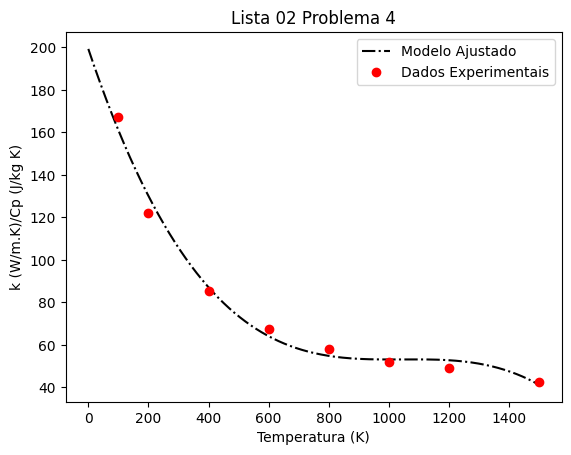

In [ ]:
# Dados Experimentais: Temperatura (K) e k (W/m.K)/Cp (J/kg K)
T = np.array([1e2, 2e2, 4e2, 6e2, 8e2, 1e3, 1.2e3, 1.5e3])
Cp = np.array([167, 122, 85.4, 67.4, 58.2,52.1,49.3,42.5])

# Montar o Sistema de Equações Mínimos Quadrados
ndata = len(T)
sx = np.sum(T)
sxx = np.sum(T**2)
sx3 = np.sum(T**3)
sx4 = np.sum(T**4)
sx5 = np.sum(T**5)
sx6 = np.sum(T**6)

sy = np.sum(Cp)
sxy = np.sum(T*Cp)
sx2y = np.sum(Cp*T**2)
sx3y = np.sum(Cp*T**3)

A = np.array([[ndata, sx, sxx, sx3],
              [sx, sxx, sx3, sx4],
              [sxx, sx3, sx4, sx5],
              [sx3, sx4, sx5, sx6]])

b = np.array([sy, sxy, sx2y,sx3y])

a0, a1, a2, a3 = eliminacao_gaussiana(A,b)

# Gerar a curva ajustada
Cp_calc = a0 + a1 * T + a2 * T**2 + a3*T**3
print(f'Modelo Quadrático: Cp = {a0} + {a1}T + {a2}T^2 + {a3}T^3')

# Plotar o gráfico dos dados experimentais e modelo ajustado
Tcalc = np.linspace(0,1500,1500)
Cp_calc = a0 + a1 * Tcalc + a2 * Tcalc**2 + a3*Tcalc**3

plt.plot(Tcalc, Cp_calc, '-.k', label='Modelo Ajustado')
plt.plot(T, Cp, 'or', label='Dados Experimentais')
plt.xlabel('Temperatura (K)')
plt.ylabel('k (W/m.K)/Cp (J/kg K)')
plt.title('Lista 02 Problema 4')
plt.legend()
plt.show()